# Portfolio Optimization 

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [8]:
tickers = ['JPM', 'GS', 'BCS', 'MS', 'C']

data = yf.download(tickers, start='2020-08-07', end='2021-08-07')

[*********************100%***********************]  5 of 5 completed


In [9]:
df = data['Adj Close']
df.head()

,BCS,C,GS,JPM,MS
Date,,,,,
2020-08-07,5.448987,49.956463,202.342285,95.481819,48.814983
2020-08-10,5.488330,50.665749,203.420670,96.692413,49.037971
2020-08-11,5.655538,51.528381,205.052856,99.747665,50.201389
2020-08-12,5.645702,51.135406,206.092407,98.902184,50.783096
2020-08-13,5.527673,50.694496,202.458878,98.354546,50.589195


## RETURNS

### Calculating percent change

In [12]:
returns = df.pct_change()
returns.head()

,BCS,C,GS,JPM,MS
Date,,,,,
2020-08-07,NaN,NaN,NaN,NaN,NaN
2020-08-10,0.007220,0.014198,0.005330,0.012679,0.004568
2020-08-11,0.030466,0.017026,0.008024,0.031598,0.023725
2020-08-12,-0.001739,-0.007626,0.005070,-0.008476,0.011587
2020-08-13,-0.020906,-0.008622,-0.017631,-0.005537,-0.003818


### Allocating random weights

In [13]:
weights = [0.2, 0.1, 0.2, 0.2, 0.3]
portfolio_return = returns.dot(weights)
portfolio_return.head()

Date
2020-08-07         NaN
2020-08-10    0.007836
2020-08-11    0.022838
2020-08-12    0.001684
2020-08-13   -0.010822
dtype: float64

## RISK

In [14]:
returns_covariance = returns.cov()*252
returns_covariance.head()

,BCS,C,GS,JPM,MS
BCS,0.187452,0.096684,0.073506,0.086395,0.079346
C,0.096684,0.107065,0.069137,0.074328,0.071180
GS,0.073506,0.069137,0.074643,0.060059,0.068297
JPM,0.086395,0.074328,0.060059,0.078507,0.066621
MS,0.079346,0.071180,0.068297,0.066621,0.086232


### Portfolio covariance

In [18]:
portfolio_variance = np.transpose(weights)@returns_covariance@weights
portfolio_risk = np.sqrt(portfolio_variance)

### Risk

In [20]:
portfolio_risk
print(f'Portfolio risk is {portfolio_risk}')

Portfolio risk is 0.28220706629122566


## MODERN PORTFOLIO THEORY

In [46]:
#creating lists to store the portfolio weights, returns and volatility

port_return = []
port_vol = []
port_weights = []

assets = len(df.columns)
num_port = 10000

In [47]:
# individual returns of assets

individual_returns = df.resample('M').last().pct_change().mean()

In [48]:
# storing new values
for i in range(num_port):
    weights_curr = np.random.random(assets)
    #normalizing
    weights_curr = weights_curr / np.sum(weights_curr)
    #adding it to the list
    port_weights.append(weights_curr)
    
    #returns
    rets = np.dot(weights_curr, individual_returns)
    port_return.append(rets)
    
    #risk
    var = np.transpose(weights_curr)@returns_covariance@weights_curr
    sd = np.sqrt(var)
    
    #annualizing to give volatility
    annual_volatility = sd * np.sqrt(252)
    port_vol.append(annual_volatility)

In [49]:
# Creating dictionary of volatility and returns

port = {'Returns': port_return, 'Volatility': port_vol}

for index, symbol in enumerate(df.columns.tolist()):
    port[symbol +'weight'] = [w[index] for w in port_weights]

In [50]:
# Compiling to a dataframe

df_port = pd.DataFrame(port)
df_port.head()

,Returns,Volatility,BCSweight,Cweight,GSweight,JPMweight,MSweight
0,0.053230,4.431506,0.117063,0.249787,0.241095,0.088351,0.303704
1,0.054909,4.371990,0.172449,0.062070,0.395784,0.221536,0.148161
2,0.053890,4.737021,0.331538,0.001132,0.086804,0.321564,0.258962
3,0.053954,4.991063,0.430191,0.147130,0.218226,0.108959,0.095494
4,0.051523,4.300463,0.056761,0.151105,0.193545,0.323566,0.275022


## Efficient Frontier

Text(0, 0.5, 'Portfolio Returns')

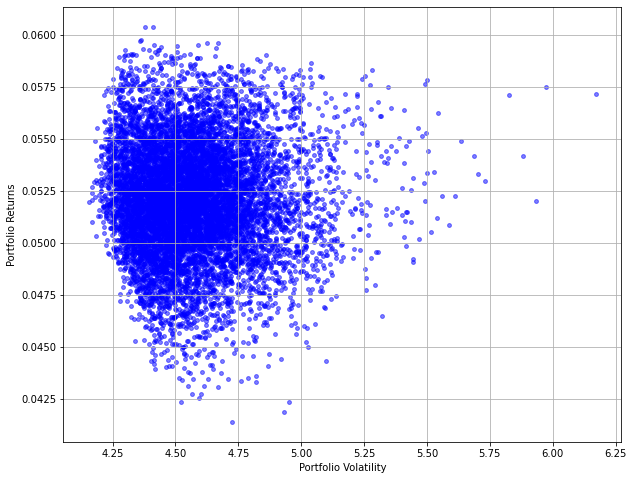

In [52]:
df_port.plot.scatter(x='Volatility', y='Returns', grid=True, figsize=[10,8], marker='o', color='b',s=15, alpha=0.5 )
plt.xlabel('Portfolio Volatility')
plt.ylabel("Portfolio Returns")

## Finding weights

### Minimizing volatility

In [53]:
min_port_vol = df_port.iloc[df_port['Volatility'].idxmin()]
print(min_port_vol)

Returns       0.051941
Volatility    4.155267
BCSweight     0.000484
Cweight       0.025060
GSweight      0.456267
JPMweight     0.473146
MSweight      0.045042
Name: 7003, dtype: float64


### Maximizing reutrns

In [54]:
max_ret_port = df_port.iloc[df_port['Returns'].idxmax()]
max_ret_port

Returns       0.060392
Volatility    4.381102
BCSweight     0.086786
Cweight       0.005753
GSweight      0.392483
JPMweight     0.006128
MSweight      0.508850
Name: 5550, dtype: float64

### Sharpe Ratio

In [55]:
rf = 0.01

sr_port = df_port.iloc[((df_port['Returns'] - rf) / df_port['Volatility']).idxmax()]
print(sr_port)

Returns       0.060392
Volatility    4.381102
BCSweight     0.086786
Cweight       0.005753
GSweight      0.392483
JPMweight     0.006128
MSweight      0.508850
Name: 5550, dtype: float64


### Optimized results

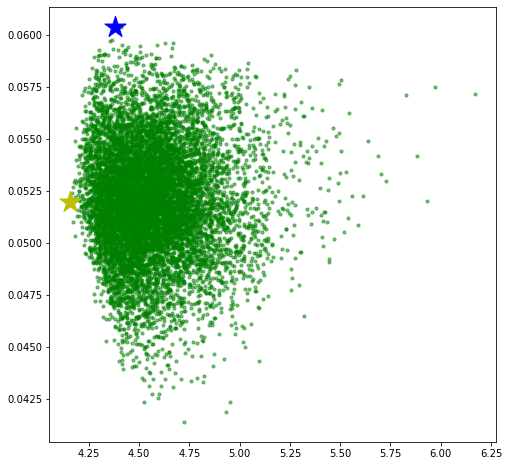

In [58]:
plt.subplots(figsize=[8,8])
plt.scatter(df_port['Volatility'], df_port['Returns'], marker='o', color='g', s=10, alpha=0.5)
plt.scatter(sr_port[1], sr_port[0], marker="*", color='b', s=500)
plt.scatter(min_port_vol[1], min_port_vol[0], marker='*', color='y', s=500)